# OrionMonoceros test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *
def load_data(fits_path):
    hdu = fits.open(fits_path)[0]
    data = hdu.data
    wcs = WCS(hdu.header)

    if data.ndim>3:
        # droping out the stokes dimension
        data = np.ascontiguousarray(data[0])
        wcs = wcs.dropaxis(3)

        if data.shape[0]==1:
            # in case data is not a cube but an image
            data = np.ascontiguousarray(data[0])
            wcs = wcs.dropaxis(2)
    
    # in case NaN values exist on data
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    return data,wcs,hdu

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

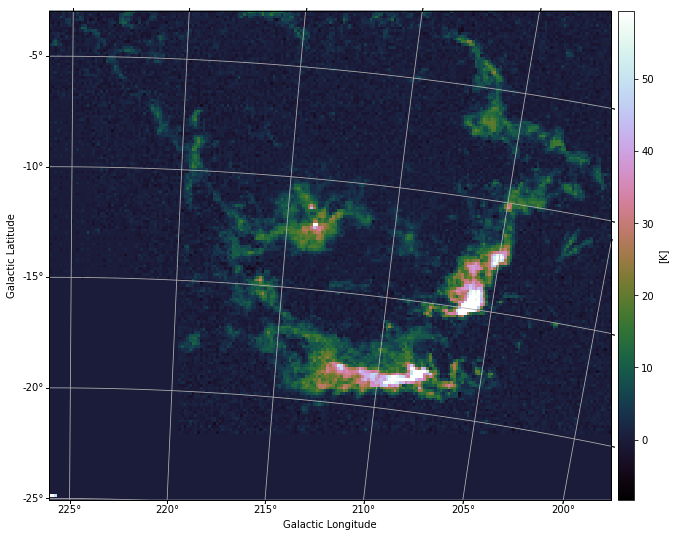

In [2]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=6.833755925097559, description='back_level', max=13.667511850195117, m…

[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.989190088142358%
[INFO] Number of ICEs: 14
Isolated Cloud Entity A: 4359 pixels of significant emission.
Isolated Cloud Entity B: 44 pixels of significant emission.
Isolated Cloud Entity C: 31 pixels of significant emission.
Isolated Cloud Entity D: 41 pixels of significant emission.
Isolated Cloud Entity E: 169 pixels of significant emission.
Isolated Cloud Entity F: 71 pixels of significant emission.
Isolated Cloud Entity G: 295 pixels of significant emission.
Isolated Cloud Entity H: 743 pixels of significant emission.
Isolated Cloud Entity I: 27 pixels of significant emission.
Isolated Cloud Entity J: 34 pixels of significant emission.
Isolated Cloud Entity K: 120 pixels of significant emission.
Isolated Cloud Entity L: 21 pixels of significant emission.
Isolated Cloud Entity M: 24 pixels of significant emission.
Isolated Cloud Entity N: 34 pixels of significant emission.


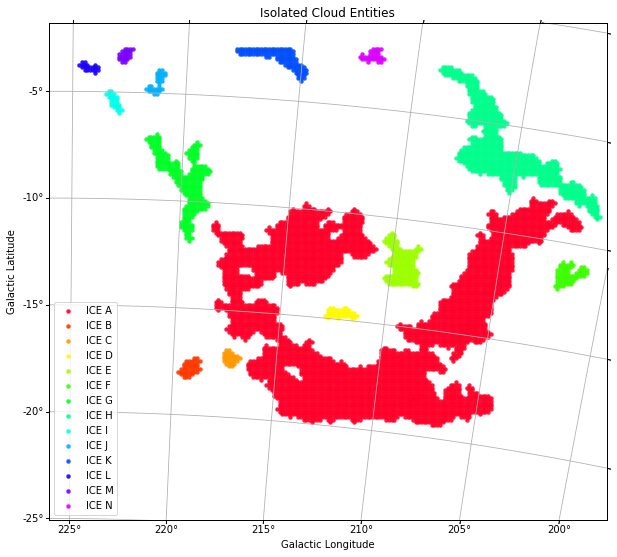

####################################################################################################


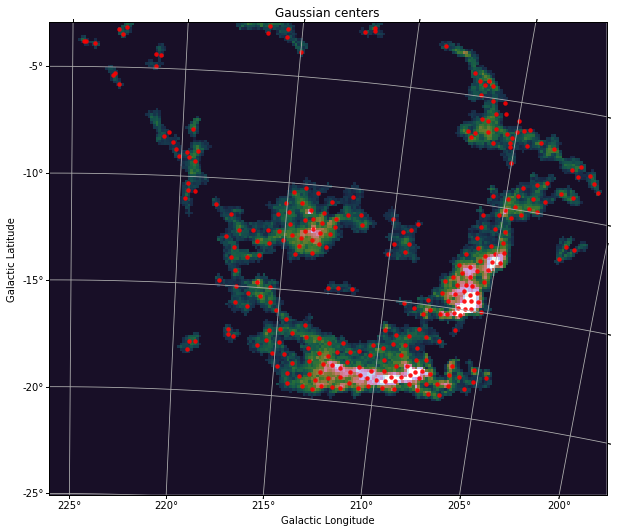

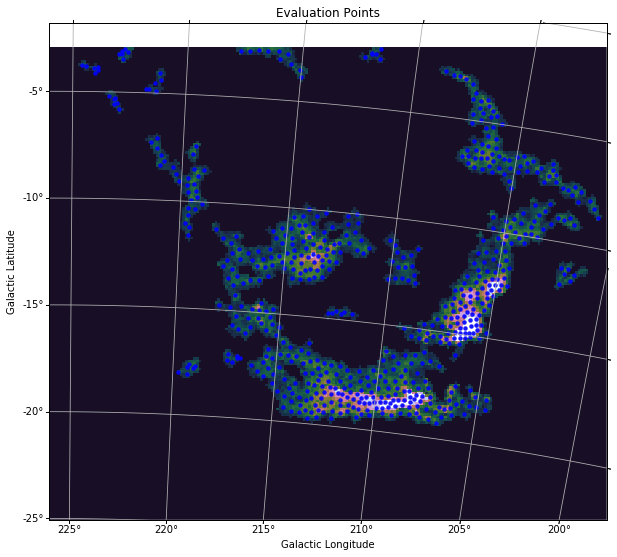

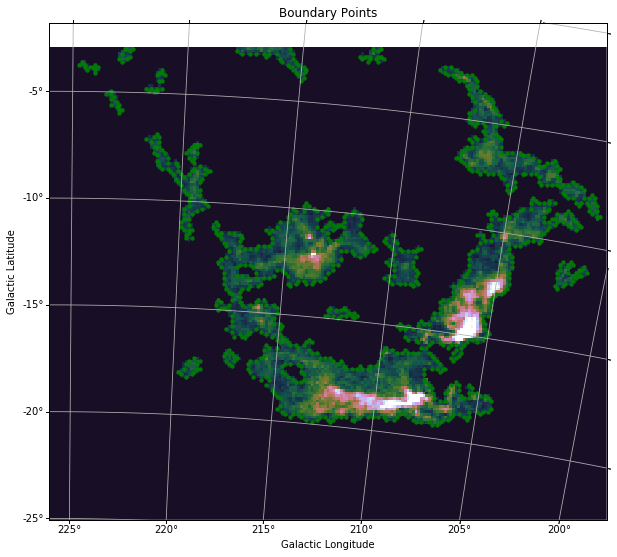

In [4]:
hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=True, n_gaussians=300)

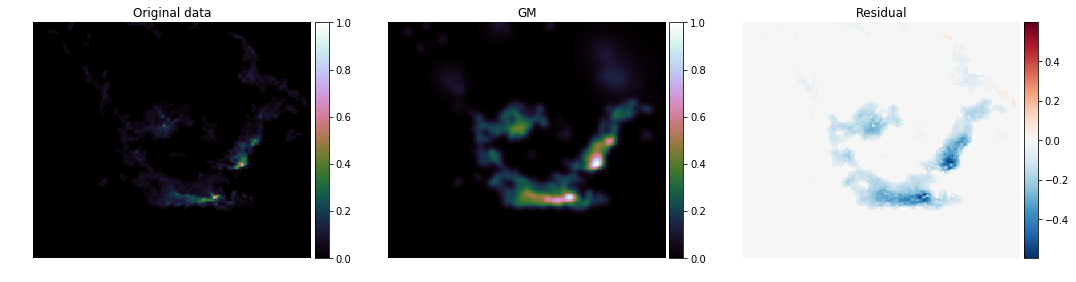

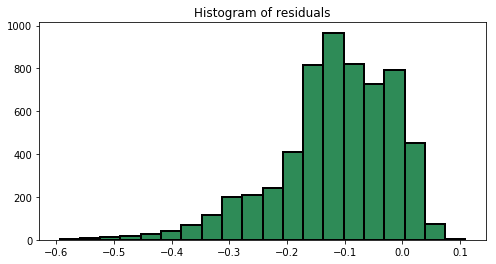

RESIDUAL STATS
RMS of residual: 0.06233996585366471
Inf norm of residual: 0.594239029971722
Variance of residual: 0.0035263891381681475
Normalized flux addition: 1.6681772917375863
Normalized flux lost: 0.027570050598943387


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m1.prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.026762770608381007
Inf norm of residual: 0.4159504623542276
Variance of residual: 0.0006884232769067673
Normalized flux addition: 0.1419579354414278
Normalized flux lost: 0.07554680050443015


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.010619082714098404
Inf norm of residual: 0.024215348768544975
Variance of residual: 0.00011276480892308728
Normalized flux addition: 0.09072202149484551
Normalized flux lost: 0.09050470721615528


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.010009896721379325
Inf norm of residual: 0.02742997536731317
Variance of residual: 9.342325665914201e-05
Normali

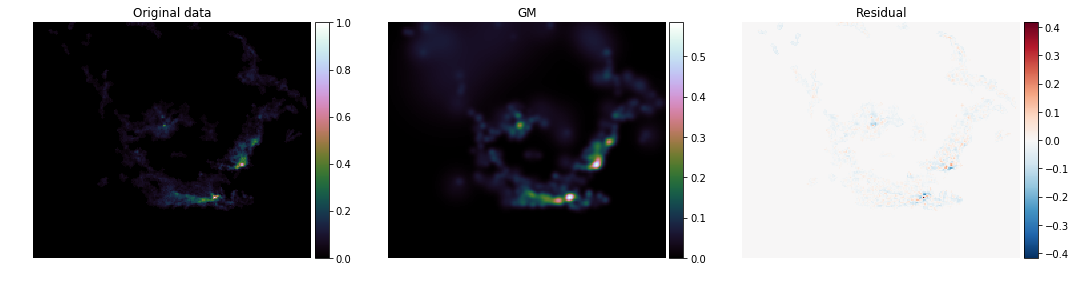

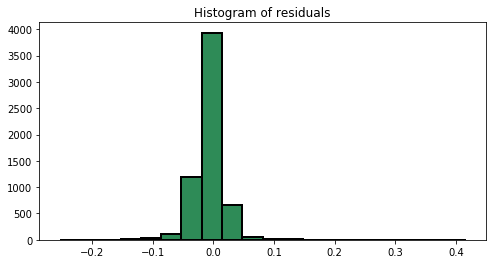

RESIDUAL STATS
RMS of residual: 0.010017177153991308
Inf norm of residual: 0.41595045796509533
Variance of residual: 9.933792988026944e-05
Normalized flux addition: 0.16060841696864317
Normalized flux lost: 0.07387157136217644


In [7]:
hdmc.get_residual_stats();

In [8]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 139.3202028274536


In [9]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.35453542327880355
sig variation:  0.28952060459544704


#### Profiling results

In [10]:
print(open('hdmc_m1.prof', 'r').read())

         699455 function calls in 139.320 seconds

   Ordered by: internal time
   List reduced from 109 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   231124   95.782    0.000   95.782    0.000 {fgm_eval.gm_eval2d_2}
       14   33.518    2.394  139.277    9.948 {built-in method scipy.optimize._minpack._lmdif}
   115555    5.791    0.000  105.772    0.001 hdmclouds_v1.py:919(F)
   115583    3.057    0.000    3.057    0.000 utils.py:150(sig_mapping)
   115571    1.103    0.000    1.103    0.000 {built-in method numpy.core.multiarray.concatenate}
   115652    0.045    0.000    0.045    0.000 {built-in method builtins.len}
       18    0.005    0.000    0.005    0.000 {built-in method numpy.core.multiarray.dot}
      287    0.003    0.000    0.003    0.000 socket.py:334(send)
        9    0.001    0.000    0.001    0.000 {method 'outer' of 'numpy.ufunc' objects}
      107    0.001    0.000    0.001    0.000 {method 'reduce' of 'n

***

### Building the hierarchical tree

In [ ]:
hdmc.build_hierarchical_tree()

In [ ]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [14]:
hdmc.visualize()

interactive(children=(Text(value='', description='split'), Text(value='', description='join1'), Text(value='',…

***